In [1]:
import pandas as pd                         #relevent libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('adult.csv')
pd.set_option('max_columns', None)

In [4]:
data #15 features and 48842 instances 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
data[data == '?'].count()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

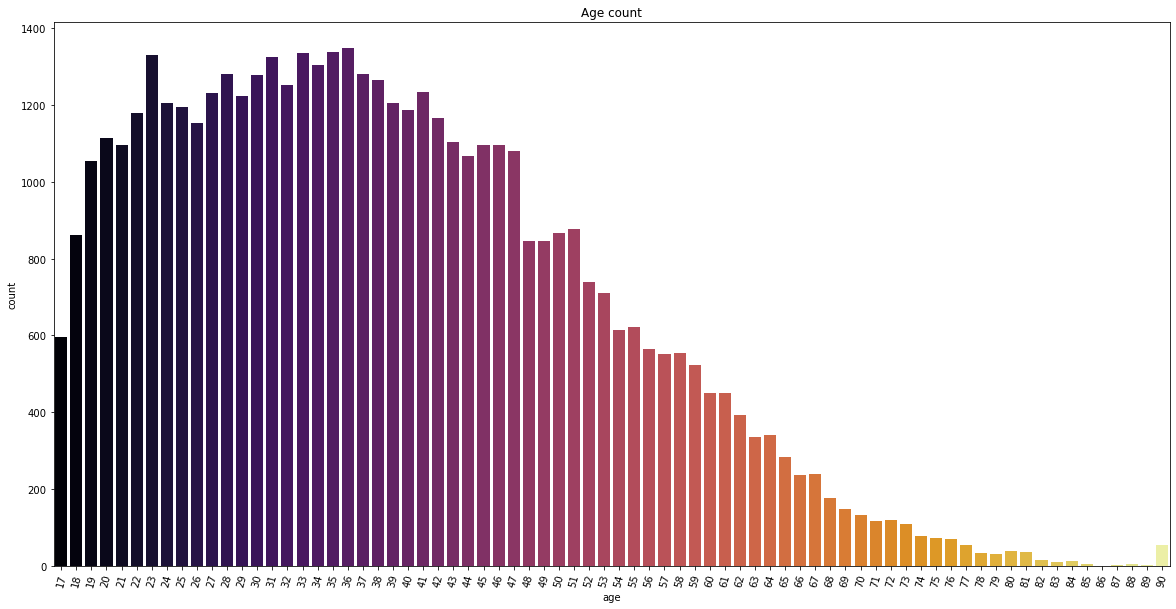

In [10]:
plt.figure(figsize=(20,10))          #age distribution in dataset
plt.xticks(rotation = 75)
plt.title('Age count')
sns.countplot(data.age,palette='inferno')
plt.show()

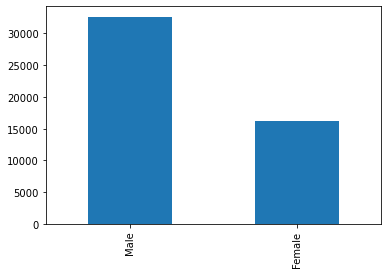

In [11]:
data['gender'].value_counts().plot(kind='bar')           #more male than female

# Data cleaning and preprocessing

In [12]:
data['workclass'] = data['workclass'].replace('?', np.nan)
data['occupation'] = data['occupation'].replace('?', np.nan)
data['native-country'] = data['native-country'].replace('?', np.nan)

In [13]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

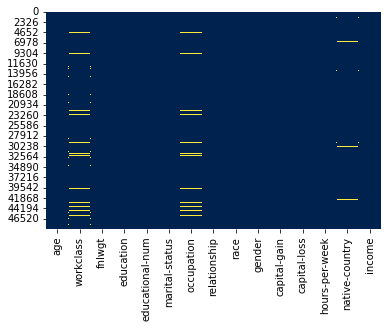

In [14]:
sns.heatmap(data.isnull(),cbar=False, cmap='cividis') #heatmap to see missing values

In [15]:
print(data['income'].unique())

['<=50K' '>50K']


In [16]:
def income_to_numeric(x):              # income <=$50,000 : 0
    if x =='<=50K':                    # income >=$50,000 : 1
        return 0
    if x =='>50K':
        return 1
    else:
        return x

data["income"] = data["income"].apply(income_to_numeric)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [17]:
print(data['gender'].unique())

['Male' 'Female']


In [18]:
def gender_to_numeric(x):        #Male will be 0, Female will be 1
    if x =='Male':
        return 0
    if x =='Female':
        return 1
    else:
        return x

data["gender"] = data["gender"].apply(gender_to_numeric)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,1,0,0,30,United-States,0


In [19]:
print(data['race'].unique())

['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


In [20]:
def race_to_numeric(x): #Black = 0, White = 1, Asian-Pac-Islander = 2, Other = 3, Amer-Indian-Eskimo = 4
    if x == "Black":
        return 0
    if x == "White":
        return 1
    if x == "Asian-Pac-Islander":
        return 2
    if x == "Other":
        return 3
    if x == "Amer-Indian-Eskimo":
        return 4
    else: 
        return 
    
data["race"] = data["race"].apply(race_to_numeric)
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,0,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,1,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,1,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,0,0,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,1,1,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,1,0,0,0,30,United-States,0
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,0,0,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,1,0,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,1,1,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,1,0,0,0,10,United-States,0


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3 = LabelEncoder()

In [23]:
data['workclass_n'] = labelencoder1.fit_transform(data['workclass'])
data['education_n'] = labelencoder2.fit_transform(data['education'])
data['occupation_n'] = labelencoder3.fit_transform(data['occupation'])
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_n,education_n,occupation_n
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,0,0,0,0,40,United-States,0,3,1,6
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,1,0,0,0,50,United-States,0,3,11,4
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,1,0,0,0,40,United-States,1,1,7,10
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,0,0,7688,0,40,United-States,1,3,15,6
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,1,1,0,0,30,United-States,0,8,15,14


In [24]:
df = data.drop(['workclass','occupation', 'capital-gain', 'capital-loss', 'native-country', 'fnlwgt','education', 'marital-status', 'relationship'], axis='columns')
df

,age,educational-num,race,gender,hours-per-week,income,workclass_n,education_n,occupation_n
0,25,7,0,0,40,0,3,1,6
1,38,9,1,0,50,0,3,11,4
2,28,12,1,0,40,1,1,7,10
3,44,10,0,0,40,1,3,15,6
4,18,10,1,1,30,0,8,15,14
...,...,...,...,...,...,...,...,...,...
48837,27,12,1,1,38,0,3,7,12
48838,40,9,1,0,40,1,3,11,6
48839,58,9,1,1,40,0,3,11,0
48840,22,9,1,0,20,0,3,11,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   educational-num  48842 non-null  int64
 2   race             48842 non-null  int64
 3   gender           48842 non-null  int64
 4   hours-per-week   48842 non-null  int64
 5   income           48842 non-null  int64
 6   workclass_n      48842 non-null  int32
 7   education_n      48842 non-null  int32
 8   occupation_n     48842 non-null  int32
dtypes: int32(3), int64(6)
memory usage: 2.8 MB


In [26]:
df.isnull().sum()

age                0
educational-num    0
race               0
gender             0
hours-per-week     0
income             0
workclass_n        0
education_n        0
occupation_n       0
dtype: int64

# Decision Tree - Can deal with categorical variables and missing values 

Continuous variables are variables that can have an infinite number of possible values, as opposed to discrete variables which can only have a specified range of values. 
An example of a continuous variable would be the number of miles that a car has driven in its lifetime.

In [27]:
features = ["income","age", "educational-num", "race", "gender", "hours-per-week", "workclass_n", "education_n", "occupation_n"]
df = df[features]
df.head(10)

,income,age,educational-num,race,gender,hours-per-week,workclass_n,education_n,occupation_n
0,0,25,7,0,0,40,3,1,6
1,0,38,9,1,0,50,3,11,4
2,1,28,12,1,0,40,1,7,10
3,1,44,10,0,0,40,3,15,6
4,0,18,10,1,1,30,8,15,14
5,0,34,6,1,0,30,3,0,7
6,0,29,9,0,0,40,8,11,14
7,1,63,15,1,0,32,5,14,9
8,0,24,10,1,1,40,3,15,7
9,0,55,4,1,0,10,3,5,2


In [28]:
X = df.drop('income', axis=1)
y = df['income']

In [29]:
X

,age,educational-num,race,gender,hours-per-week,workclass_n,education_n,occupation_n
0,25,7,0,0,40,3,1,6
1,38,9,1,0,50,3,11,4
2,28,12,1,0,40,1,7,10
3,44,10,0,0,40,3,15,6
4,18,10,1,1,30,8,15,14
...,...,...,...,...,...,...,...,...
48837,27,12,1,1,38,3,7,12
48838,40,9,1,0,40,3,11,6
48839,58,9,1,1,40,3,11,0
48840,22,9,1,0,20,3,11,0


In [30]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
X_train.shape # 34189 train

(34189, 8)

In [34]:
X_test.shape # 14653 test

(14653, 8)

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
default_tree = DecisionTreeClassifier()
default_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
default_tree.get_params()  #default parameters 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [37]:
predictions = default_tree.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, predictions)   #score with default max_depth

0.7657135057667371

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
cfmatrix = confusion_matrix(y_test, predictions, labels=[0,1])
print(cfmatrix)

[[9613 1620]
 [1813 1607]]


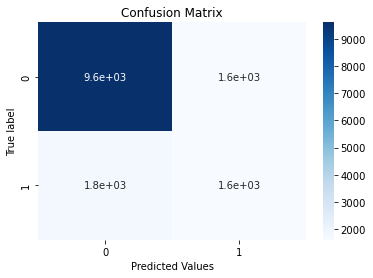

In [40]:
ax = sns.heatmap(cfmatrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True label');


plt.show()

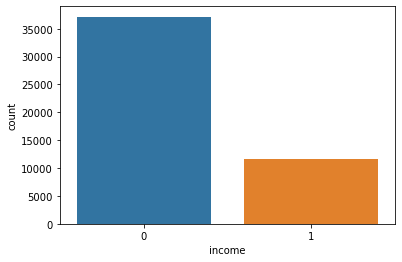

In [41]:
sns.countplot(df.income)

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     11233
           1       0.50      0.47      0.48      3420

    accuracy                           0.77     14653
   macro avg       0.67      0.66      0.67     14653
weighted avg       0.76      0.77      0.76     14653



In [43]:
tree1 = DecisionTreeClassifier(max_depth=2)   
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [44]:
tree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [45]:
predictions1 = tree1.predict(X_test)
predictions1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
accuracy_score(y_test, predictions1)     #score with max_depth = 2

0.7883709820514571

In [47]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11233
           1       0.56      0.47      0.51      3420

    accuracy                           0.79     14653
   macro avg       0.70      0.68      0.69     14653
weighted avg       0.78      0.79      0.78     14653



In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': range(2,20), 'max_depth': range(2,20), }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 20),
                         'max_leaf_nodes': range(2, 20)},
             return_train_score=True)

In [49]:
best_tree_cv = grid.best_estimator_
best_tree_cv_plot = export_graphviz(best_tree_cv, out_file=None, feature_names=features[1:])
grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 15}

In [50]:
tree2 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes = 15)   
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)

In [51]:
tree2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 15,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [52]:
predictions2 = tree2.predict(X_test)
predictions2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
accuracy_score(y_test, predictions2)  

0.8097317955367501

In [54]:
cfmatrix1 = confusion_matrix(y_test, predictions2, labels=[0,1])
print(cfmatrix1)

[[10513   720]
 [ 2068  1352]]


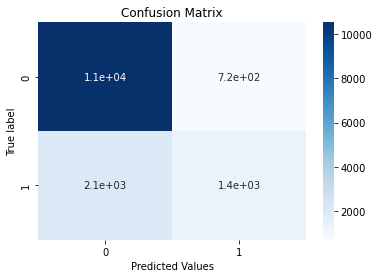

In [55]:
ax = sns.heatmap(cfmatrix1, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True label');


plt.show()

In [56]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88     11233
           1       0.65      0.40      0.49      3420

    accuracy                           0.81     14653
   macro avg       0.74      0.67      0.69     14653
weighted avg       0.79      0.81      0.79     14653



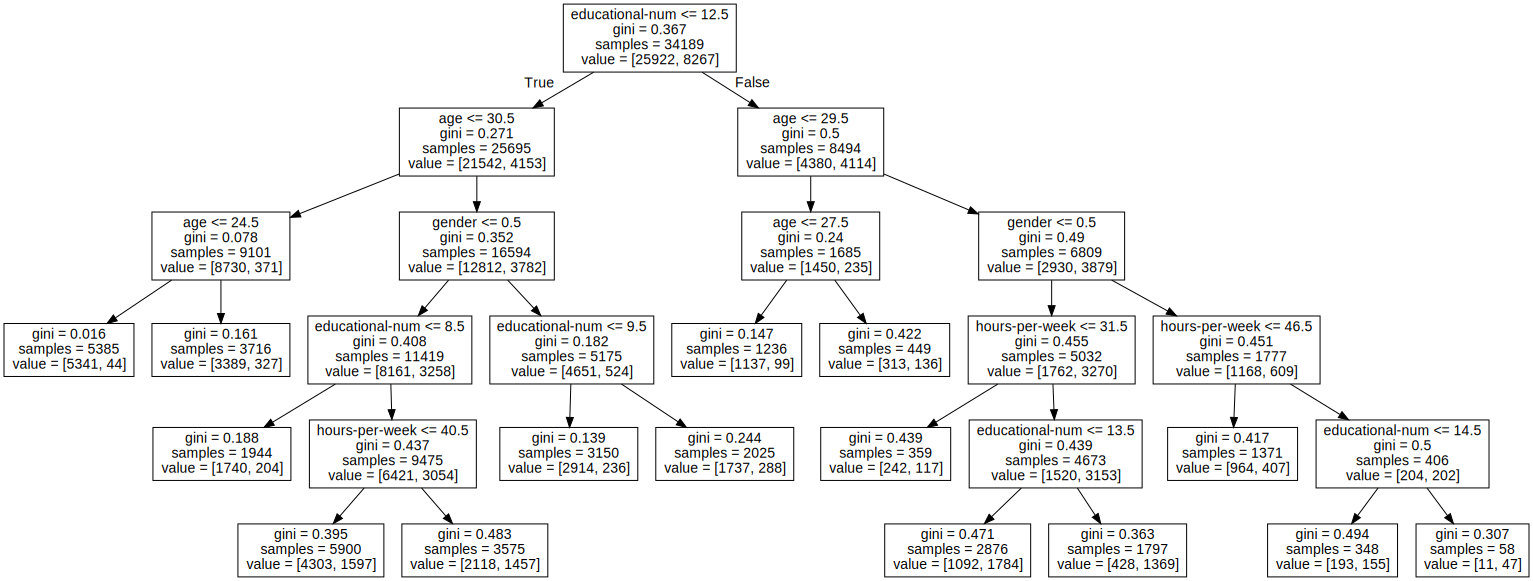

In [57]:
import graphviz
graphviz.Source(best_tree_cv_plot)

# ROC AUC 
AUC-ROC curve helps us visualize how well our machine learning classifier is performing.
The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve

In [58]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(X_train, y_train)

C:\Users\kjahn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred_prob1 = model1.predict_proba(X_test)[:,1]

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred_prob1)

auc_score1 = roc_auc_score(y_test, pred_prob1)
print(auc_score1)

0.8168298892725746


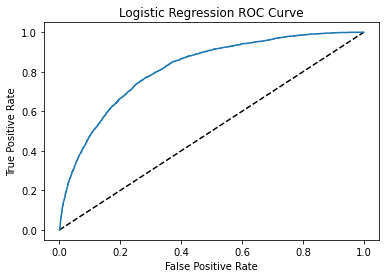

In [61]:
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.savefig("LR-ROC.png")

In [62]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=4)

model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [63]:
pred_prob2 = model2.predict_proba(X_test)[:,1]

fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob2)

auc_score2 = roc_auc_score(y_test, pred_prob2)
print(auc_score2)

0.765589131959249


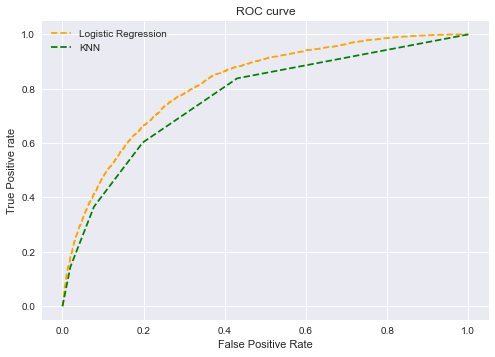

In [64]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='KNN')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [65]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, random_state=42) #number of trees(10) befor averages of predictions 
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [66]:
pred = classifier.predict(X_test)   # predict on the test set

In [67]:
accuracy_score(y_test, pred)

0.7928751791442026

In [68]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11233
           1       0.57      0.48      0.52      3420

    accuracy                           0.79     14653
   macro avg       0.71      0.68      0.69     14653
weighted avg       0.78      0.79      0.79     14653



In [69]:
class100 = RandomForestClassifier(n_estimators=20, random_state=42) # parameter with 20 n_estimators

In [70]:
class100.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [71]:
pred100 = class100.predict(X_test)

In [72]:
accuracy_score(y_test, pred100)

0.7947860506380946

In [73]:
print(classification_report(y_test, pred100))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11233
           1       0.57      0.48      0.52      3420

    accuracy                           0.79     14653
   macro avg       0.71      0.69      0.70     14653
weighted avg       0.78      0.79      0.79     14653



# Support Vector Machine

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
X_train

array([[-0.99623881, -0.42019869,  0.03483874, ..., -0.24297777,
         0.18090227, -1.02714842],
       [ 1.84184356, -0.42019869,  0.03483874, ..., -0.24297777,
         0.18090227,  1.05334895],
       [-0.70515344, -0.42019869,  0.03483874, ..., -0.24297777,
         0.18090227, -1.02714842],
       ...,
       [-0.77792478, -0.03145094,  0.03483874, ..., -0.24297777,
         1.21308979, -0.79598205],
       [ 0.53195939,  0.35729681, -1.99084437, ...,  1.64101835,
        -0.59323838, -1.48948117],
       [ 1.47798685,  1.52354006,  0.03483874, ..., -0.24297777,
         0.43894915,  0.5910162 ]])

In [77]:
X_test

array([[ 1.25967282, -0.42019869,  0.03483874, ..., -0.24297777,
         0.18090227,  0.12868345],
       [-0.99623881, -0.42019869,  4.08620495, ..., -0.24297777,
         0.18090227,  1.51568169],
       [ 0.31364536,  1.13479231,  0.03483874, ..., -0.24297777,
        -0.33519149,  0.5910162 ],
       ...,
       [-0.05021135, -0.03145094, -1.99084437, ..., -2.12697388,
         1.21308979, -0.3336493 ],
       [ 1.62352953, -0.42019869,  0.03483874, ...,  1.01301964,
         0.18090227,  1.05334895],
       [ 1.04135879, -0.42019869,  4.08620495, ..., -0.24297777,
         0.18090227, -1.02714842]])

In [78]:
from sklearn.svm import SVC

# linear kernel

In [79]:
model = SVC(kernel='linear', random_state=0)  
model.fit(X_train, y_train) 

SVC(kernel='linear', random_state=0)

In [80]:
y_pred = model.predict(X_test)  #predicting the test set results
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
print('Model accuracy score with linear kernel: {0:0.4f}'. format(accuracy_score(y_test, y_pred))) 

Model accuracy score with linear kernel: 0.8063


# sigmoid kernel

In [82]:
sigmoid_svc = SVC(kernel='sigmoid', random_state = 0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred = sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel : 0.7233


# rbf kernel

In [83]:
# instantiate classifier with rbf kernel 
rbf_svc = SVC(kernel='rbf', random_state = 0)


# fit classifier to training set
rbf_svc.fit(X_train,y_train)


# make predictions on test set
y_pred = rbf_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel : 0.8131


# polynomial kernel

In [84]:
# instantiate classifier with polynomial kernel 
poly_svc =SVC(kernel='poly', random_state = 0) 


# fit classifier to training set
poly_svc.fit(X_train, y_train)


# make predictions on test set
y_pred = poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel : 0.8065
